# Wrangling Data

## Gathering Data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
# Gathering data from csv file called twitter-archive-enhanced, and printing the first 5 rows
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# importing dog image predictions into jupyter workspace and printing the first 5 rows
import requests 
response = requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#creat file
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Importing JSON and ghathering tweets data then printing the first 5 rows
import json
tweets = pd.read_json("tweet-json.txt", lines=True, encoding = 'utf-8')
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data

In [7]:
# Information of WeRateDogs dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# Information of image predictions dataframe
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# Information of API tweets dataframe
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [10]:
# Showing the number of null values in every columns in tweets dataframe
tweets.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [11]:
# Showing the number of occurrences of rating_denominator values
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# Showing the number of occurrences of rating_numerator values
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# Showing the number of occurrences of name values
df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
an             7
Daisy          7
Toby           7
Buddy          7
Bella          6
Milo           6
Jack           6
Leo            6
Scout          6
Dave           6
Jax            6
Koda           6
Rusty          6
Stanley        6
Oscar          6
Phil           5
            ... 
Ozzie          1
Sunshine       1
Lugan          1
Grizzwald      1
Goose          1
Huxley         1
Arlen          1
Remy           1
Crouton        1
Skye           1
Berb           1
Pinot          1
Vinscent       1
Sprout         1
Gert           1
Nimbus         1
Pancake        1
Darrel         1
Ricky          1
Spanky         1
Miguel         1
Sage           1
Bruiser        1
Covach         1
Livvie         1
Leonard        1
Derby          1
DayZ          

**Quality Issues**
<ul>
    <li>
        Seems that there's columns that have an empty value like: in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, etc.
    </li>
    <li>
         Timestamp column values aren't in DateTime data type.
    </li>
    <li>
        The name column has false values such as "a" which occurred 55 times.
    </li>
    <li>
        There are false values in numerator and denominator columns.
    </li>
    <li>
        The rows in WeRateDogs data frame and images predictions data frame doesn't match.
    </li>
    <li>
        There are null and unwanted columns in tweets' data frames.
    </li>
    <li>
        We need original tweets only, so I'm dropping replies and retweets.
    </li>
    <li>
        There are null values that are not treated as null.
    </li>
</ul>
<br>
<strong>Tidiness Issues</strong>
<ul>
    <li>
        The following columns can be put in one column: doggo, floofer, pupper, and puppo.
    </li>
    <li>
        The three data frames should be in one data frame.
    </li>
</ul>

## Cleaning Data

In [14]:
# Making copies of the data frames
df_new = df.copy()
image_pred_new = image_pred.copy()
tweets_new = tweets.copy()

**Define**<br>
Changing false values in name column to null

**Code**

In [15]:
df_new["name"].replace({"a": None, "an": None,"None":None,"The":None, "the":None}, inplace=True)

**Test**

In [16]:
df_new.name.isnull().sum()

815

**Define**<br>
Changing void values to null

**Code**

In [17]:
df_new["doggo"].replace({"None":None}, inplace=True)
df_new["floofer"].replace({"None":None}, inplace=True)
df_new["pupper"].replace({"None":None}, inplace=True)
df_new["puppo"].replace({"None":None}, inplace=True)

**Test**

In [18]:
df_new.doggo.isnull().sum()

2259

In [19]:
df_new.floofer.isnull().sum()

2346

In [20]:
df_new.pupper.isnull().sum()

2099

In [21]:
df_new.puppo.isnull().sum()

2326

**Changing the above void values to null will help me clean the data more efficiently**

###  Tidiness

**Define**<br>
Putting doggo, floofer, pupper, and puppo in one column named dog_stage

**Code**

In [22]:
df_new['dog_stage']= df_new['doggo'].fillna('') + df_new['floofer'].fillna('') + df_new['pupper'].fillna('') + df_new['puppo'].fillna('')
df_new['dog_stage']= df_new['dog_stage'].replace('',np.nan)

In [23]:
# Dropping doggo, floofer, pupper, and puppo columns
df_new = df_new.drop(labels=['doggo','floofer','pupper','puppo'], axis=1)

**Test**

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1541 non-null object
dog_stage                     380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


**Define**<br>
Merging all data frames in one frame

**Code**

In [25]:
frames = df_new.merge(tweets_new, right_on='id',left_on='tweet_id')
all_df = frames.merge(image_pred_new, right_on='tweet_id',left_on='tweet_id')

**Test**

In [26]:
all_df.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'user',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog

### Quality

**Define**<br>
Changing Timestamp from object to datetime

**Code**

In [27]:
all_df['timestamp']= pd.to_datetime(all_df['timestamp']);

**Test**

In [28]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 56 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null datetime64[ns]
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             1427 non-null object
dog_stage                        320 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       20

**Define**<br>
Dropping retweets and replies

**Code**

In [29]:
all_df.drop(all_df[all_df.retweeted_status_id.notnull()].index, axis=0, inplace=True)
all_df.drop(all_df[all_df.in_reply_to_status_id_x.notnull()].index, axis=0, inplace=True)

**Test**

In [30]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 56 columns):
tweet_id                         1971 non-null int64
in_reply_to_status_id_x          0 non-null float64
in_reply_to_user_id_x            0 non-null float64
timestamp                        1971 non-null datetime64[ns]
source_x                         1971 non-null object
text                             1971 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null int64
rating_denominator               1971 non-null int64
name                             1379 non-null object
dog_stage                        303 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1971 no

**Define**<br>
Dropping null columns

**Code**

In [31]:
all_df.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'retweeted_status_id', 'retweeted_status_user_id', 
             'retweeted_status_timestamp', 'in_reply_to_screen_name', 'in_reply_to_status_id_y', 'in_reply_to_status_id_str', 
             'in_reply_to_user_id_y', 'in_reply_to_user_id_str', 'retweeted_status', 'contributors', 'coordinates', 'geo', 
             'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'place'], axis = 1, inplace = True)

**Test**

In [32]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 38 columns):
tweet_id                         1971 non-null int64
timestamp                        1971 non-null datetime64[ns]
source_x                         1971 non-null object
text                             1971 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null int64
rating_denominator               1971 non-null int64
name                             1379 non-null object
dog_stage                        303 non-null object
created_at                       1971 non-null datetime64[ns]
display_text_range               1971 non-null object
entities                         1971 non-null object
extended_entities                1971 non-null object
favorite_count                   1971 non-null int64
favorited                        1971 non-null bool
full_text                        1971 non-null object
id                  

**Export all_df in csv**

In [33]:
all_df.to_csv('df_master.csv') 

## Data analysis

In [34]:
# Showing the first 5 rows of the master dataframe with showing all columns
pd.set_option('display.max_columns', None)
all_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source_y,truncated,user,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,False,en,0.0,0.0,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,False,en,0.0,0.0,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,en,0.0,0.0,4328,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,False,en,0.0,0.0,8964,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,False,en,0.0,0.0,9774,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Which is the most common dog name?

In [35]:
# Counting the occurrences of every value in name column
all_df.name.value_counts()

Charlie       11
Cooper        10
Oliver        10
Lucy          10
Penny          9
Tucker         9
Sadie          8
Winston        8
Toby           7
Daisy          7
Lola           7
Bo             6
Bella          6
Stanley        6
Jax            6
Koda           6
Rusty          5
Milo           5
Buddy          5
Scout          5
Louis          5
Leo            5
Dave           5
Bailey         5
Chester        5
Oscar          5
Phil           4
Jerry          4
Chip           4
Archie         4
              ..
Shawwn         1
Shooter        1
Sandra         1
Tedders        1
Sage           1
Ricky          1
Bauer          1
Crouton        1
Kaiya          1
Kirk           1
Margo          1
Andy           1
Ito            1
Jomathan       1
Brandonald     1
Dutch          1
Naphaniel      1
Skye           1
Berb           1
Quinn          1
Pinot          1
Logan          1
Vinscent       1
Tyrone         1
Sprout         1
Gert           1
Nimbus         1
Pancake       

**As we can see Charlie is the most common name** 

### Picture of highest ratings with the name charlie.

In [36]:
# Storing max rating dogs with the name Charlie and storing there photos URLs
img = all_df[(all_df['name'] == 'Charlie')]
img = img[img['rating_numerator'] == img.rating_numerator.max()]
img_url = img.jpg_url

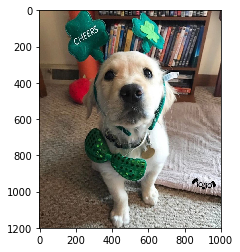

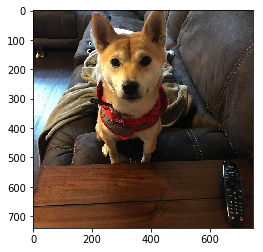

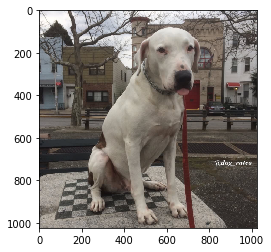

In [37]:
# Printing every photo in img_url
from PIL import Image
import requests
for i in range(img.shape[0]):
    response = requests.get(img['jpg_url'].iloc[i], stream=True)
    globals()["imge%s" % i] = Image.open(response.raw)
    plt.figure()
    plt.imshow(globals()["imge%s" % i])
    plt.show()
    
# This post was helpful : https://stackoverflow.com/questions/49092390/displaying-getting-images-from-an-url-in-python

**There's three top rated dogs named Charlie**

### Most favorited dog stage

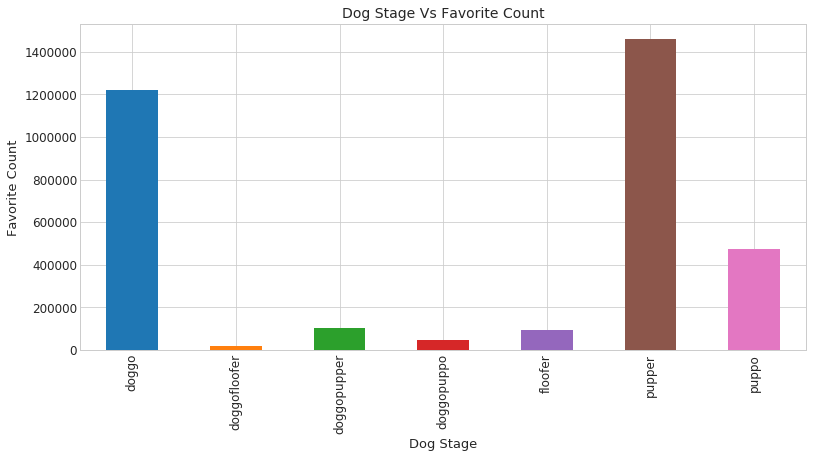

In [40]:
# Plotting dog stages with there favorite count sum
all_df.groupby('dog_stage').sum()['favorite_count'].plot(kind='bar',figsize=(13,6),fontsize=12);
# Styling the plot
import seaborn as sns
plt.title("Dog Stage Vs Favorite Count",fontsize = 14)
plt.xlabel('Dog Stage',fontsize = 13)
plt.ylabel('Favorite Count',fontsize = 13);
sns.set_style("whitegrid")

**Here we can see that pupper is the most favorite dog stage**